<a href="https://colab.research.google.com/github/saulobw/Pi-accidentes/blob/main/EDA_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [ ]:
df= pd.read_csv('aviones_arreglado.csv')
df.head()

,fecha,ruta,operador,tipo_de_avion,total_a_bordo,pasajeros_a_bordo,personal_a_bordo,total_fallecidos,pasajeros_fallecidos,personal_fallecido,ground,summary,mes,dia,año
0,1908-9-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,1.0,1.0,1,0,0.0,"During a demonstration flight, a U.S. Army fly...",9.0,17.0,1908.0
1,1909-9-07,"Juvisy-sur-Orge, France",NaN,Wright Byplane,1.0,0.0,1.0,1.0,0,0,0.0,Eugene Lefebvre was the first pilot to ever be...,9.0,7.0,1909.0
2,1912-7-12,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5.0,0.0,5.0,5.0,0,5,0.0,First U.S. dirigible Akron exploded just offsh...,7.0,12.0,1912.0
3,1913-8-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,0.0,1.0,1.0,0,1,0.0,The first fatal airplane accident in Canada oc...,8.0,6.0,1913.0
4,1913-9-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...,9.0,9.0,1913.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5015 entries, 0 to 5014
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 5015 non-null   object 
 1   ruta                  5009 non-null   object 
 2   operador              5003 non-null   object 
 3   tipo_de_avion         4998 non-null   object 
 4   total_a_bordo         4990 non-null   float64
 5   pasajeros_a_bordo     4787 non-null   float64
 6   personal_a_bordo      4790 non-null   float64
 7   total_fallecidos      4999 non-null   float64
 8   pasajeros_fallecidos  4773 non-null   object 
 9   personal_fallecido    4774 non-null   object 
 10  ground                4963 non-null   float64
 11  summary               4950 non-null   object 
 12  mes                   5005 non-null   float64
 13  dia                   5003 non-null   float64
 14  año                   5002 non-null   float64
dtypes: float64(8), object

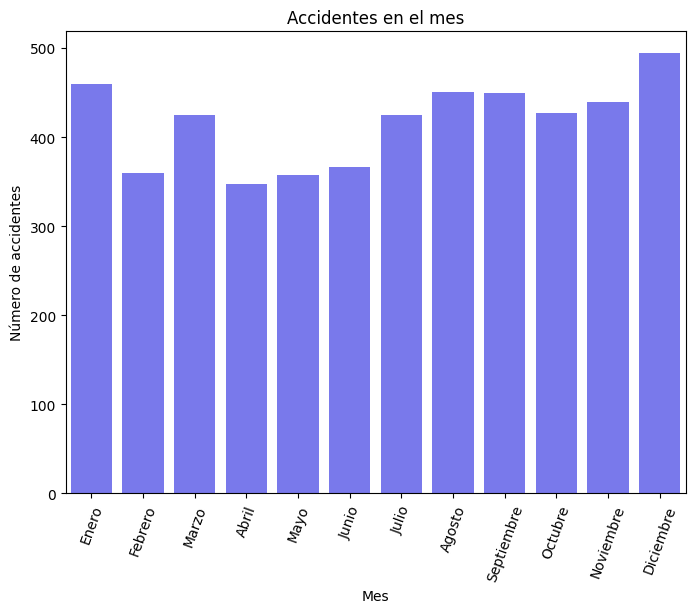

In [ ]:
#accidentes por mes
meses = {
    1: 'Enero',
    2: 'Febrero',
    3: 'Marzo',
    4: 'Abril',
    5: 'Mayo',
    6: 'Junio',
    7: 'Julio',
    8: 'Agosto',
    9: 'Septiembre',
    10: 'Octubre',
    11: 'Noviembre',
    12: 'Diciembre'
}

# Reemplazar los números de mes por los nombres de mes en una nueva columna "mes_nombre"
df['mes_nombre'] = df['mes'].map(meses)

# Creamos el grafico
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='mes_nombre',color= 'b', alpha= 0.6 ,order=list(meses.values()))
plt.xlabel('Mes')
plt.ylabel('Número de accidentes')
plt.title('Accidentes en el mes')
plt.xticks(rotation=70)
plt.show()

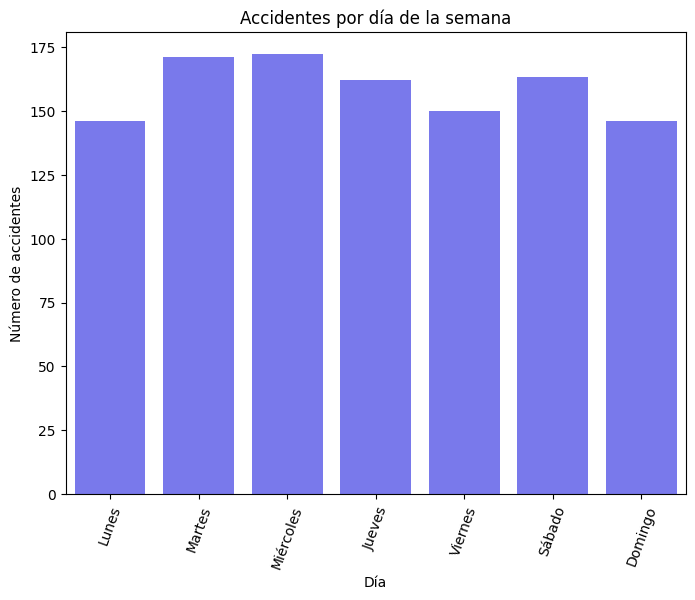

In [ ]:
#accidentes por dia
dias = {
    1: 'Lunes',
    2: 'Martes',
    3: 'Miércoles',
    4: 'Jueves',
    5: 'Viernes',
    6: 'Sábado',
    7: 'Domingo'
}

df['dia_nombre'] = df['dia'].map(dias)

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='dia_nombre', color= 'b', alpha= 0.6 ,order=list(dias.values()))
plt.xlabel('Día')
plt.ylabel('Número de accidentes')
plt.title('Accidentes por día de la semana')
plt.xticks(rotation=70)
plt.show()

In [ ]:
#accidentes por año
años = pd.Series(df.año.value_counts()).sort_index()
px.line(años, x= años.index, y= años.values, title='Accidentes por año', labels={'index': 'años', 'y': 'Numeros de accidentes'})



In [ ]:
# Obtener el recuento de accidentes por año
años = pd.Series(df['año'].value_counts()).sort_index()

# Crear el gráfico de línea
fig = px.line(años, x=años.index, y=años.values, title='Accidentes por año', labels={'index': 'Años', 'y': 'Número de accidentes'})

# Agregar el histograma
fig.add_trace(px.histogram(df, x='año').data[0])

# Mostrar el gráfico
fig.show()

In [ ]:
px.box(df, y='año',title='Distribucion de accidentes por año', width= 600, labels={'año': 'Año'})

In [ ]:
#vemos los accidentes por tipo de avion
tipo_avion= pd.Series(df['tipo_de_avion'].value_counts())
tipo_avion

Douglas DC-3                                333
de Havilland Canada DHC-6 Twin Otter 300     81
Douglas C-47A                                70
Douglas C-47                                 63
Douglas DC-4                                 41
                                           ... 
Vickers Viscount 759D                         1
H-21B                                         1
Avro 685 York C1                              1
Piper PA-24-250 Comanche                      1
Antonov An 26B-100                            1
Name: tipo_de_avion, Length: 2471, dtype: int64

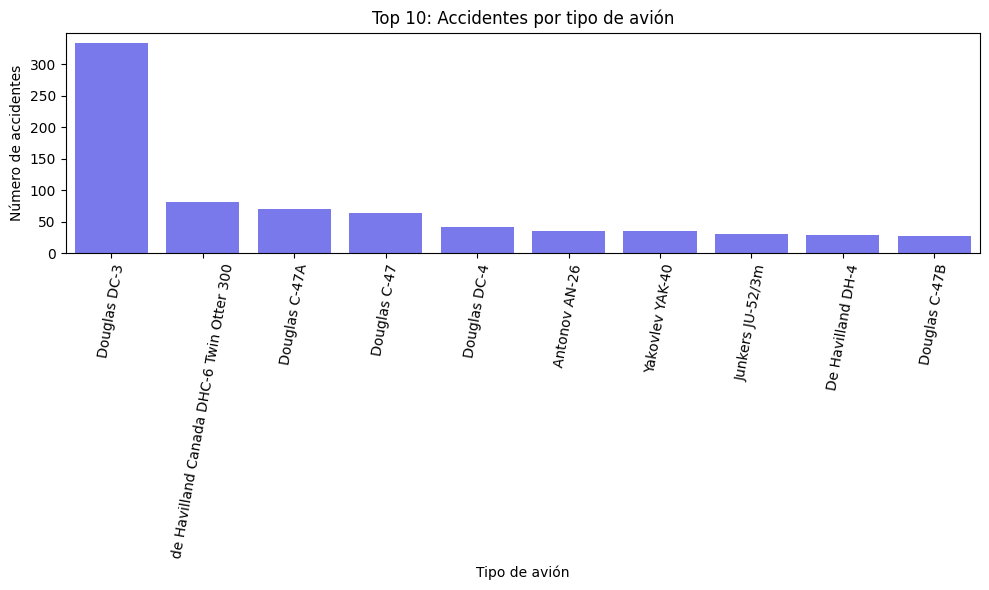

In [ ]:
#obtenemos el top 10 de aviones en cuanto a cantidad de accidentes
plt.figure(figsize=(10, 6))
top_10_tipos = df['tipo_de_avion'].value_counts().head(10)

ax = sns.barplot(x=top_10_tipos.index, y=top_10_tipos.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)

plt.xlabel('Tipo de avión')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por tipo de avión')

plt.tight_layout()
plt.show()

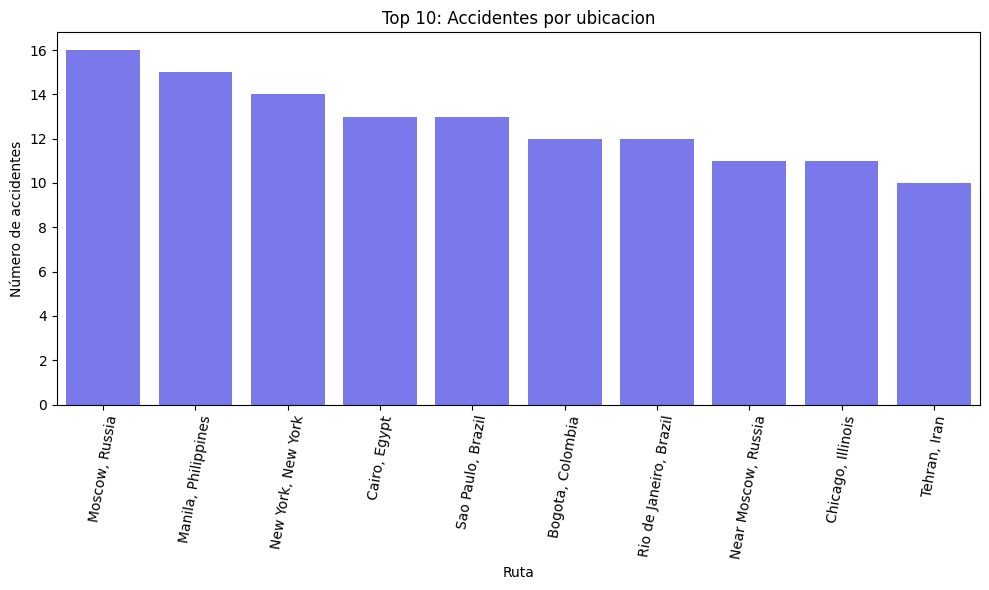

In [ ]:
#ranking de ubicaciones
plt.figure(figsize=(10, 6))

top_10_localizaciones = df['ruta'].value_counts().head(10)

ax = sns.barplot(x=top_10_localizaciones.index, y=top_10_localizaciones.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Ruta')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por ubicacion')

plt.tight_layout()
plt.show()


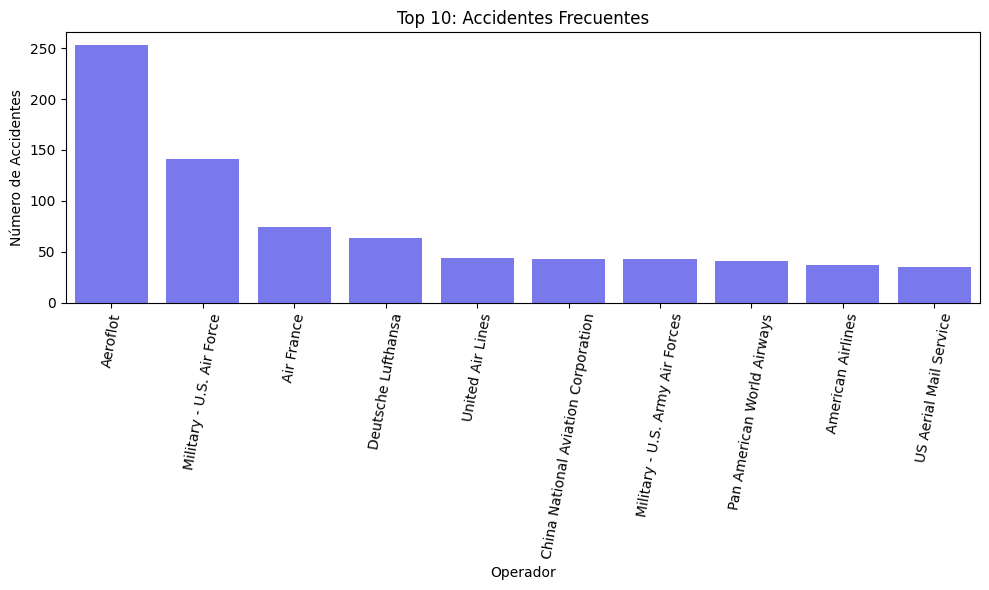

In [ ]:
#ranking de operadores
plt.figure(figsize=(10, 6))

top_10_tipos = df['operador'].value_counts().head(10)

ax = sns.barplot(x=top_10_tipos.index, y=top_10_tipos.values, color = 'b', alpha= 0.6)
ax.set_xticklabels(ax.get_xticklabels(), rotation=80)  # Rotar las etiquetas del eje x

plt.xlabel('Operador')
plt.ylabel('Número de Accidentes')
plt.title('Top 10: Accidentes Frecuentes')

plt.tight_layout()
plt.show()

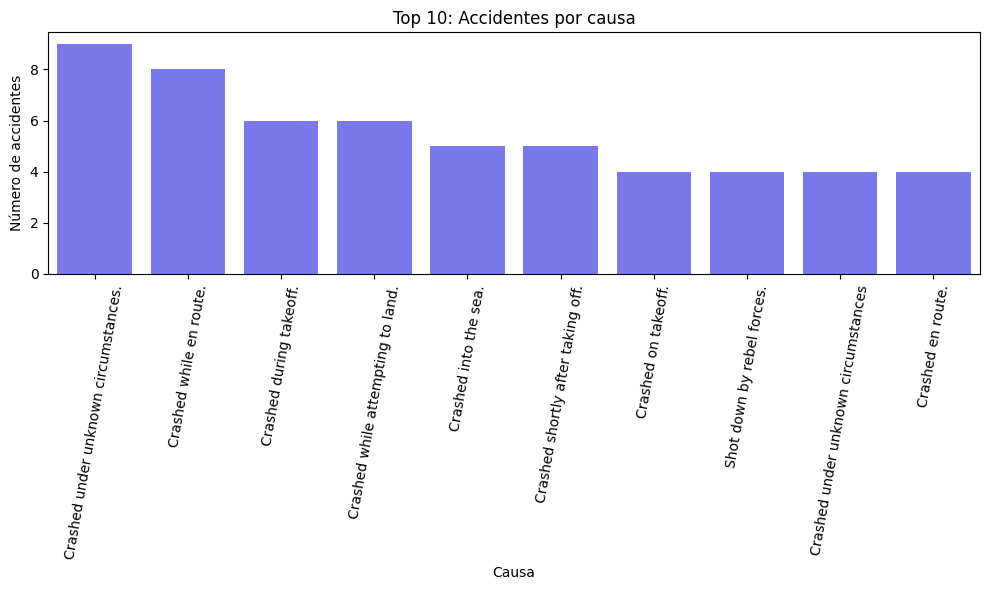

In [ ]:
#ranking por causa de accidentes
plt.figure(figsize=(10, 6))

top_10_causas = df['summary'].value_counts().head(10)

sns.barplot(x=top_10_causas.index, y=top_10_causas.values, color= 'b', alpha= 0.6)
plt.xticks(rotation=80)

plt.xlabel('Causa')
plt.ylabel('Número de accidentes')
plt.title('Top 10: Accidentes por causa')

plt.tight_layout()
plt.show()

In [ ]:
#comparamos entre pasajeros a bordo y fallecidos

import plotly.graph_objects as go

dt = df.groupby('año').agg({'total_fallecidos': 'sum', 'total_a_bordo': 'sum'}).reset_index()
fig = go.Figure()
fig.add_trace(go.Scatter(x=dt['año'], y=dt['total_a_bordo'], name='total_a_bordo'))
fig.add_trace(go.Scatter(x=dt['año'], y=dt['total_fallecidos'], name='total_fallecidos'))
fig.update_layout(title='Total Fallecimientos en avión por año',
                  xaxis_title='año',
                  yaxis_title='cantidad')

fig.show()